# Лекция №1 

# Работа с растровыми изображенями

__Растровое изображение__ — изображение, представляющее собой сетку пикселей — цветных точек. 
Важными характеристиками изображения являются: размер, глубина цвета и цветовое пространство.

<img src="img/RGB_cube.png" alt="Drawing" style="width: 300px;"/>

Самый распространённый способ выделить объект — это цвет.

__Цвет__ — это свойство тел отражать или испускать видимое излучение определенного спектрального состава и интенсивности.

Трихроматическая теория (сетчатка глаза имеет 3 вида рецепторов света, ответственных за цветное зрение) полагает, что достаточно всего трёх чисел, чтобы описать цвет (красный, синий, зелёный). Т.е. используя три значения __R, G, B__  

Цветовые пространства бывают линейные и нелинейные.
К линейным относится __RGB__. Изучим его подробней.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

## отображение графиков в ноутбуке
%matplotlib inline

In [2]:
## считаем изображение
img  = cv2.imread('img/RGB_cube.png')

In [3]:
## посмотрим, какой тип объекта 
type(img)

numpy.ndarray

In [4]:
## размерность
img.shape

(457, 640, 3)

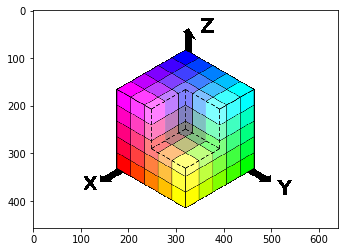

In [5]:
## преобразуем RGB в BGR для корректного отображения
## это необходимо из-за особенностей matplotlib
img_plt = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2BGR)

## отобразим объект
plt.imshow(img_plt);

## Grayscale

__Grayscale__ — цветовой режим изображений, которые отображаются в оттенках серого цвета, размещённые в виде таблицы в качестве эталонов яркости белого цвета.

В компьютерном представлении широко распространённая серая шкала использует на каждый пиксел изображения один байт (8 бит) информации. Такая шкала передаёт 256 оттенков (градаций) серого цвета, или яркости (значение 0 представляет чёрный цвет, а значение 255 — белый).

<img src="img/grad_grayscale.png" alt="Drawing" style="width: 200px;"/>

Преобразование цветного изображения в оттенки серого из RGB пересчитывают по формуле:

\begin{align}
\ Y' & = 0.2126R + 0.7152G + 0.0722B \\
\end{align}

В __OpenCV__ сменить цветовой режим изображения можно с помощью функции __cv2.cvtColor(img, code)__,

где __img__ — исходное изображение, __code__ — кодировка для смены цвета. Все кодировки есть в документации. В рамках занятий мы рассмотрим лишь их часть.

In [6]:
## создадим grayscale изображение с помощью openCV
gray = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2GRAY)

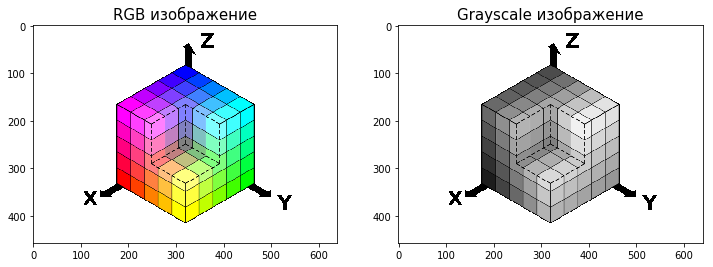

In [7]:
## поглядим, что получили
fig, m_axs = plt.subplots(1, 2, figsize = (12, 8))
ax1, ax2 = m_axs

ax1.set_title('RGB изображение', fontsize=15)
ax1.imshow(img_plt)
ax2.set_title('Grayscale изображение', fontsize=15)
ax2.imshow(gray, cmap='gray');

### Поиграемся с каналами

Выделим каналы изображения. Они представимы как массивы чисел, поэтому не составит труда их разделить из исходного изобрадения. Посмоторим на картинку, где есть только красный, зеленый и синий.

In [8]:
## не забываем про особенности Python
img_data = img.copy()

## R scale
r = img_data[:,:,0]
r[r != 255] = 0
## G scale
g = img_data[:,:,1]
g[g != 255] = 0
## B scale
b = img_data[:,:,2]
b[b != 255] = 0

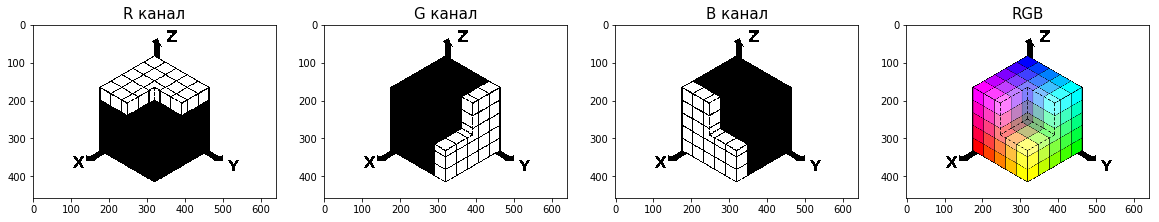

In [9]:
## посмотрим на результат
fig, m_axs = plt.subplots(1, 4, figsize = (20, 9))
ax1, ax2, ax3, ax4 = m_axs

ax1.set_title('R канал', fontsize=15)
ax1.imshow(r, cmap='gray')
ax2.set_title('G канал', fontsize=15)
ax2.imshow(g, cmap='gray')
ax3.set_title('B канал', fontsize=15)
ax3.imshow(b, cmap='gray')
ax4.set_title('RGB', fontsize=15)
ax4.imshow(img_plt);

__*Контрольные вопросы:*__

1. Почему так получилось?

Давайте изменим конфигурацию каналов, чтобы посмотреть на изменения.

In [10]:
## не забываем про особенности Python
img_data = img.copy()

## R scale
r = img_data[:,:,0]
r[r < 0] = 0
## G scale
g = img_data[:,:,1]
g[g < 0] = 0
## B scale
b = img_data[:,:,2]
b[b < 0] = 0

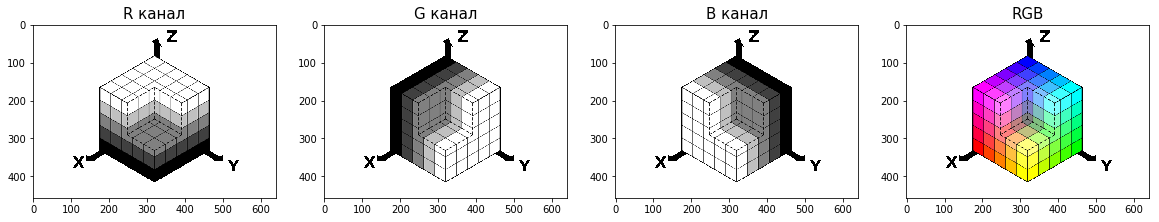

In [11]:
## посмотрим на результат
fig, m_axs = plt.subplots(1, 4, figsize = (20, 9))
ax1, ax2, ax3, ax4 = m_axs

ax1.set_title('R канал', fontsize=15)
ax1.imshow(r, cmap='gray')
ax2.set_title('G канал', fontsize=15)
ax2.imshow(g, cmap='gray')
ax3.set_title('B канал', fontsize=15)
ax3.imshow(b, cmap='gray')
ax4.set_title('RGB', fontsize=15)
ax4.imshow(img_plt);

__*Контрольные вопросы:*__

1. Какой вывод можно сделать из этих примеров?

2. Чем неудобна __RGB__ кодировка цвета?

## Поиск по цвету

Бывают задачи, в которых отличительной особенностью предмета являтются его цветовые признаки. Рассмотрим пример:

<img src="img/cat.jpg" alt="Drawing" style="width: 300px;"/>

Как мы можем в этом найти кота? Для начала мы можем оценить глазами, что цвет кота отличается от цвета окружения – он ярко рыжий и отлично виден в траве. Как мы можем выделить этот цвет в OpenCV? Для этого существует специальная функция __cv2.inRange()__, она принимает на вход изображение и диапазон цвета, который мы хотим выделить. __На выходе мы получаем черно-белое изображение__, где белым выделены пиксели, цвета которых попадали в диапазон а черным – с цветом вне требуемого. Попробуем выделить на изображении кота:

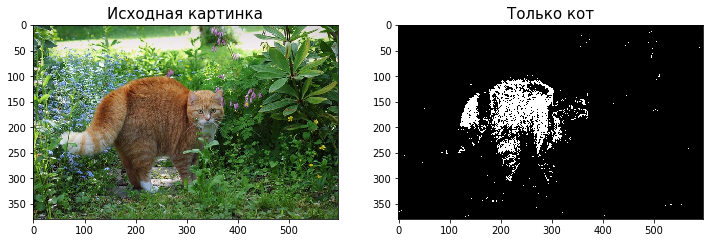

In [12]:
cat_img  = cv2.imread('img/cat.jpg')

## значения цвета можно посмотреть в gimp или paint
pix = 256
low_red = (0.0*pix,0.11*pix,0.37*pix)
high_red = (0.35*pix,0.4*pix,0.99*pix)

"""
low_red = (17, 50, 110)
high_red = (101, 140, 180)
"""

cat_area = cv2.inRange(cat_img, low_red, high_red)

## посмотрим на результат
fig, m_axs = plt.subplots(1, 2, figsize = (12, 9))
ax1, ax2 = m_axs

ax1.set_title('Исходная картинка', fontsize=15)
cat_img_plt = cv2.cvtColor(cat_img.copy(), cv2.COLOR_RGB2BGR)
ax1.imshow(cat_img_plt, cmap='gray')
ax2.set_title('Только кот', fontsize=15)
ax2.imshow(cat_area, cmap='gray');

"""
cv2.imshow('only car', cat_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

""";

__Кот в RGB – не кот. Выбираем цветовое пространство.__

С данным изображением мы уже можем работать, но что-то в нем не то. Кот выделен не целиком, и есть много лишних точек. На самом деле, мы научимся даже из такого получать много полезной информации, но в данный момент мы сделаем одно очень важное и правильное улучшение. Как вы могли заметить – мы работаем с изображением в пространстве __RGB__. У данного пространства, кроме не очевидной для человеческого восприятия записи цвета, есть еще один недостаток в нашем случае. Чтобы его понять, рассмотрим что из себя представляет __RGB__:

![title](img/RGB_coub.png)

Пространство представляет из себя куб с длинной стороны 256, где любой цвет задается координатами соответствующей точки на данном кубе. Данная концепция получила широкое распространение из-за того, что в случае формирования цвета на экране устройства, такого как телефон или монитор компьютера, изображение формируется за счет точек трех цветов – синего, зеленого, и красного. Теперь перейдем к нашей функции __cv2.inRange()__. Она принимает набор из двух цветов – точек на данном кубе. Что в таком случае мы будем считать за цвет, который удовлетворяет нашим критериям? Для ответа на данный вопрос нарисуем схематично тот же самый куб RGB:

![title](img/RGB_sheme.png)

На данной схеме становится понятно, что пространство между двумя заданными точками цвета также является кубом RGB. Таким образом, наша функция находит вложенный цветовой куб в полном кубе RGB. Кроме того, что это может непонятно звучать, это и работает не самым лучшим образом: представим что мы хотим найти оттенки пурпурного цвета, в таком случае мы размещаем наш вложенный куб как можно ближе к пурпурному. Но при таком размещении, мы так или иначе затрагиваем все остальные цвета, из-за того, что стороны куба параллельны основному. Как в таком случае поступить?

Мы не первые,кто сталкивается с такой задачей и такой проблемой. И одно из существующих решений – переход в другое цветовое пространство. Если поставить задачей, что во главе угла у нас фиксируется оттенок цвета или соотношение между RGB, то мы приходим к следующей схеме:

![title](img/RGB_HSV_trans.png)

В данной модели мы переходим к следующим координатам – __оттенок, насыщенность и значение__. Именно в данных понятиях люди обычно описывают цвета. 

Под цветовым тоном (__Hue__) имеют в виду именно цвет (длину волны). 

Насыщенность (__Saturation__) характеризует близость цвета к белому (розовый ближе к белому чем красный). 

Значение (__Value__) описывается всех сложнее и в модели HS ее можно описать как общую яркость точки или цвета.

Все серые цвета (лежащие на диагонали куба) при этом проецируются в центральную точку. Чтобы с помощью этой модели можно было закодировать все цвета, доступные в RGB-модели, необходимо добавить вертикальную ось яркости (или интенсивности) (I). В итоге получается:

![title](img/HSV.png)

В OpenCV диапазоны разные. S, V находятся в [0,255], а H – в [0, 180]. Обычно H находится в диапазоне [0,360] (полный круг), но для того, чтобы поместиться в байте (256 различных значений), его значение уменьшается вдвое.

В пространстве HSV проще отделить один цвет, так как вы можете просто установить правильный диапазон для H и просто позаботиться о том, чтобы S не был слишком маленьким (он будет почти белым), а V не слишком мал (это будет темно).

Например, если вам нужны почти синие цвета, вам нужно, чтобы H находилось вокруг значения 120 (например, в [110, 130]), а S, V не слишком мало (скажем, в [100, 255]).

Белый цвет не является оттенком (радуга не имеет белого цвета в нем), но представляет собой комбинацию цвета.

В HSV вам нужно взять весь диапазон H (H в [0, 180]), очень малые значения S (например, S в [0, 25]) и очень высокие значения V (например, V в [230, 255] ). Это в основном соответствует верхней части центральной оси конуса.

В данном конусе диапазон выбранных цветов будет представлять из себя конический слой. Его главные для нас атрибуты: он лежит по оттенку в заданных пределах, в отличии от RGB, его светлота и интенсивность также определяются просто и очевидно в описании цветового предела. Благодаря таким удобным и полезным свойствам данное цветовое пространство заслужило большую любовь как среди дизайнеров, так и особенно среди общества разработчиков компьютерного зрения. 

В OpenCV3 данное цветовое пространство имеет обозначение __HSV__. Переведем наше изображение в него и снова найдем котейку:

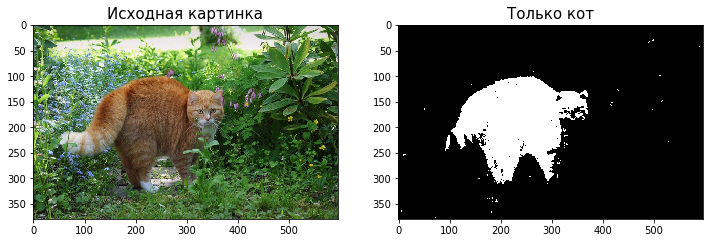

In [13]:
cat_img  = cv2.imread('img/cat.jpg')
cat_img_hsv = cv2.cvtColor(cat_img.copy(), cv2.COLOR_RGB2HSV)

hsv_low = (100, 50, 50)
hsv_high = (120, 250, 255)

cat_area = cv2.inRange(cat_img_hsv, hsv_low, hsv_high)


## посмотрим на результат
fig, m_axs = plt.subplots(1, 2, figsize = (12, 9))
ax1, ax2 = m_axs

ax1.set_title('Исходная картинка', fontsize=15)
cat_img_plt = cv2.cvtColor(cat_img.copy(), cv2.COLOR_RGB2BGR)
ax1.imshow(cat_img_plt, cmap='gray')
ax2.set_title('Только кот', fontsize=15)
ax2.imshow(cat_area, cmap='gray');

"""
cv2.imshow('img', img)
cv2.imshow('green', cat_area)
cv2.waitKey(0)
cv2.destroyAllWindows()
""";

Тут я лишь остановлюсь на моменте выбора цвета, в данном примере мы руководствовались лишь собственным глазом и оценкой того, какой цвет мы хотим найти. Этим __HSV__ замечательно отличается от __RGB__, в которой нам необходимо каждый цвет искать в справочнике или использовать сторонние программы.

***
### Посмотреть дргуие примеры работы с HSV
***

### Домашнаяя работа #1

Первой задачей по машинному зрению будет работа с геометрическими фигурами. 
Ваша задача - написать программу, которая посчитает радиус круга, сторону квадрата и катет равнобедренного прямоугольного треугольника, изображенных на картинке. 

Важно, что в данной задаче цвет каждой геометрической фигуры остается неизменным на всех изображениях.

Примеры изображений:
<img src="src/rgb_fig/task_img/test_image_00.jpg" alt="Drawing" style="width: 200px;"/>
<img src="src/rgb_fig/task_img/test_image_01.jpg" alt="Drawing" style="width: 200px;"/>

## Введение в линейную алгебру

### Матрицы и вектора 

__Прямоугольная матрица__

Пусть есть два конечных множества:

* номера строк: $M =\{1,2,\dots,m\}$;
* номера столбцов: $N =\{1,2,\dots,n\}$, 

где $m$ и $n$ — натуральные числа.

Назовём матрицей $A$ размера $m\times n$ (читается $m$ на $n$) ($m$ - __строк__, $n$ - __столбцов__). Матрица записывается как

${\textstyle A={\begin{pmatrix}a_{11}&a_{12}&\cdots &a_{1n}\\a_{21}&a_{22}&\cdots &a_{2n}\\\vdots &\vdots &a_{ij}&\vdots \\a_{m1}&a_{m2}&\cdots &a_{mn}\end{pmatrix}},}$ 

где элемент матрицы $\displaystyle a_{ij}=a(i,j)$ находится на пересечении $i$-й строки и $j$-го столбца.

* $i$-я строка матрицы ${\textstyle A(i,)={\begin{pmatrix}a_{i1}&a_{i2}&\cdots &a_{in}\end{pmatrix}};}$ 

* ${\displaystyle j}$-й столбец матрицы ${\textstyle A(,j)={\begin{pmatrix}a_{1j}\\a_{2j}\\\vdots \\a_{mj}\end{pmatrix}}.}$ 

При этом количество элементов матрицы равно ${\displaystyle m\cdot n}$.

__Невырожденная матрица__

Невырожденная матрица (иначе неособенная матрица) ― квадратная матрица, определитель которой отличен от нуля. В противном случае матрица называется вырожденной.

### Операции над матрицами

#### Сложение матриц
Складывать можно только матрицы одинакового размера.

Сложение матриц $A+B$ есть операция нахождения матрицы $C$, все элементы которой равны попарной сумме всех соответствующих элементов матриц $A$ и $B$, то есть каждый элемент матрицы $C$ равен: $$c_{i,j} = a_{i,j} + b_{i,j}$$

##### Свойства сложения матриц:

$1)$ коммутативность: $A+B = B+A$

$2)$ ассоциативность: $(A+B)+C =A+(B+C)$;

$3)$ сложение с нулевой матрицей: $A + Θ = A$;

$4)$ существование противоположной матрицы: $A + (-A) = Θ$;

#### Умножение матриц

Умножение матриц (обозначение:  $AB$, реже со знаком умножения  $A\times B$) — есть операция вычисления матрицы $C$, каждый элемент которой равен сумме произведений элементов в соответствующей строке первого множителя и столбце второго.

$c_{ij}=\sum _{k=1}^{n}a_{ik}b_{kj}$
Количество столбцов в матрице $A$ должно совпадать с количеством строк в матрице $B$, иными словами, матрица $A$ обязана быть согласованной с матрицей $B$. Если матрица $A$ имеет размерность $m\times n$, $B$ — $n \times k$, то размерность их произведения $A B = C$ есть $m \times k$.

<img src="img/AdotB.png" alt="Drawing" style="width: 200px;"/>

__Свойства умножения матриц:__

* ассоциативность: (AB)C = A(BC);
* некоммутативность (в общем случае): AB $\neq$  BA;
* произведение коммутативно в случае умножения с единичной матрицей: AE = EA;
* дистрибутивность: (A+B)C = AC + BC, A(B+C) = AB + AC;
* ассоциативность и коммутативность относительно умножения на число: (λA)B = λ(AB) = A(λB);


#### Определитель (детерминант)

В линеной алгебре существует важное понятие — __определитель матрицы__. (Обозначение: если $A$ — матрциа, то $detA$ — ее детерминант.)

В данный момент мы не будем вдаваться в подробности и все тонкости данного понятия. В курсе нам важно знать лишь несколько фактов про определитель:

* определитель — это число;
* если матрица вырождена, то ее определитель равен нулю.

In [14]:
## матрицы в numpy
A = np.array(([1, 1 ,1])).reshape((3,1))
B = np.array(([1, 1 ,1])).reshape((1,3))

In [15]:
## примерчик 1 
np.dot(A, B)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [16]:
## примерчик 2
np.dot(B, A)

array([[3]])

In [17]:
A = np.array([[1,1,1], [2, 2, 2], [3,3,3]])
B = np.array([[3,3,3], [2, 2, 2], [1,1,1]])

In [18]:
C = A + B
print(A, '\n\n', B, '\n\n', C)

[[1 1 1]
 [2 2 2]
 [3 3 3]] 

 [[3 3 3]
 [2 2 2]
 [1 1 1]] 

 [[4 4 4]
 [4 4 4]
 [4 4 4]]


In [19]:
A * 2

array([[2, 2, 2],
       [4, 4, 4],
       [6, 6, 6]])

## Афинные преобразования

Под преобразованием понимается отображение множества на себя. Другими словами, преобразование — это правило, в соответствии с которым каждому элементу множества ставится в соответствие элемент этого же множества.

Преобразование плоскости (пространства) называется аффинным, если существуют такие две аффинные системы координат, что координаты любой точки в первой системе координат совпадают с координатами ее образа во второй системе координат.

Аффинное преобразование можно рассматривать как последовательное применение (композицию) двух отображений:

Точке ставится в соответствие координаты относительно первой системы координат;
Полученным координатам ставится в соответствие точка относительно второй системы координат.
Пусть $f$ — аффинное преобразование. Рассмотрим вектор ${\overrightarrow{AB}}$ в первой системе координат и ${\overrightarrow{f(A)f(B)}}$ во второй. Так как координаты вектора определяются как разность координат конца и начала, а координаты точек ${A}$ и ${f(A)}$, $B$ и ${f(B)}$ равны в соответствующих системах координат, то вектор ${\overrightarrow{f(A)f(B)}}$ имеет те же координаты относительно второй системы координат, что и вектор ${\overrightarrow{AB}}$ относительно первой.

### Аффинные преобразования плоскости

Преобразование плоскости задается двумя скалярными функциями двух переменных:

${\begin{cases}\hat{x}=f_{1}(x,y)\\ \hat{y}=f_{2}(x,y)\end{cases}}$ или аналогично через вектор-функцию ${\begin{pmatrix}f_1(x);\ f_2(x)\end{pmatrix}^T}$

#### Формула аффинного преобразования плоскости

Преобразование $A$ плоскости называется аффинным, если координаты $(y1,y2)$ образа $Y$ выражаются через координаты $(x1,x2)$ прообраза $X \ (Y=A(X))$ по формулам:

$$
{\begin{cases}\hat{x}=a_{11}x+a_{12}y-x_{0}\\ \hat{y}=a_{21}x+a_{22}y-y_{0}\end{cases}} {\Leftrightarrow\quad} 
{{\begin{pmatrix}\hat{x}\\\hat{y}\end{pmatrix}}=A{\begin{pmatrix}x-x_{0}\\y-y_{0}\end{pmatrix}},}
$$

где матрица ${\begin{equation*}A={\begin{pmatrix}a_{11}\ a_{12}\\a_{21}\ a_{22}\end{pmatrix}}\end{equation*}}$
— невырожденная матрица (матрица аффинного преобразования).


#### Свойства аффинных преобразований плоскости


__1.__ Аффинное преобразование взаимно однозначное, кроме того:

а) преобразование, обратное к аффинному, является также аффинным;
б) композиция аффинных преобразований является также аффинным преобразованием.
***
__2.__ При аффинном преобразовании векторы преобразуются следующим образом:

г) равные векторы — в равные;
б) коллинеарные — в коллинеарные, причем отношение коллинеарных векторов сохраняется;
в) неколлинеарные — в неколлинеарные.
***
__3.__ При аффинном преобразовании сохраняется отношение, в котором точка делит отрезок.
***
__4.__ При аффинном преобразовании площадь любого параллелограмма изменяется в одном и том же отношении, т.е. умножается на одно и то же число (называемое коэффициентом искажения площади):

$\hat{S}=|det|\cdot S$, где

$S$ — площадь параллелограмма,

$\hat{S}$ — площадь образа этого параллелограмма. 

Другими словами, коэффициент искажения площади при аффинном преобразовании равен модулю определителя матрицы этого преобразования.

## Геометрические преобразования изображений    

Теперь мы рассмотрим каким образом аффинные преобразования помогут нам изменять изображения с помощью OpenCV.

In [20]:
img = cv2.imread('img/lk.jpg')
## для отрисовки в pyplot
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

### Сдвиг изображения

__Сдвиг__ — это смещение местоположения объекта. Если вам известно смещение в направлении $(x,y)$, пусть оно будет $(tx,ty)$, вы можете создать матрицу преобразования $M$ следующим образом:

$$
\begin{equation*}
\ M = \begin{pmatrix}
1 & \ 0 & \ t_x \\ 
0 & \ 1 & \ t_y \\  
\end{pmatrix}
\end{equation*}
$$

Затем вы можете взять массив Numpy типа np.float32 и передать его в функцию __cv2.warpAffine()__. Ниже приведен пример сдвига:

Раземер исходного изображения: (768, 1024, 3)


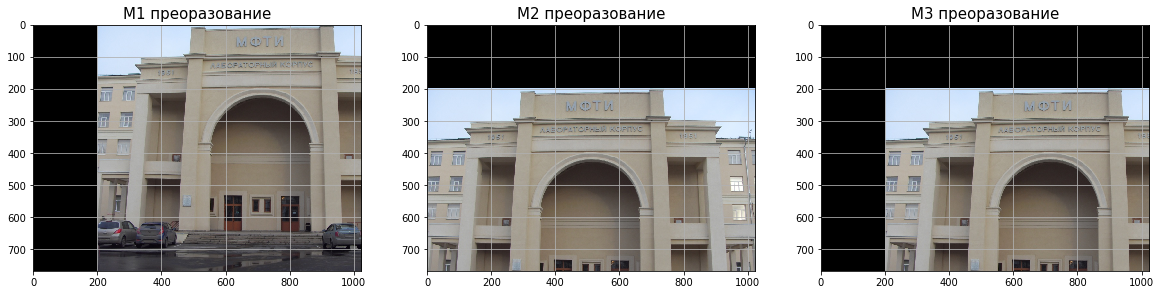

In [21]:
## сдвиг изображения

## посмотрим на размер изображения
print('Раземер исходного изображения:', img.shape)
rows, cols, _ = img.shape

## матрица афинного преобразования
M1 = np.float32([[1, 0, 200], [0, 1, 0]])
M2 = np.float32([[1, 0, 0], [0, 1, 200]])
M3 = np.float32([[1, 0, 200], [0, 1, 200]])

## визуализация
fig, m_axs = plt.subplots(1, 3, figsize=(20,8))
ax1, ax2, ax3 = m_axs

dst1 = cv2.warpAffine(img.copy(), M1, (cols, rows))
ax1.imshow(dst1)
ax1.grid()
ax1.set_title('M1 преоразование', fontsize=15)
dst2 = cv2.warpAffine(img.copy(), M2, (cols, rows))
ax2.imshow(dst2)
ax2.grid()
ax2.set_title('M2 преоразование', fontsize=15)
dst3 = cv2.warpAffine(img.copy(), M3, (cols, rows))
ax3.imshow(dst3)
ax3.grid()
ax3.set_title('M3 преоразование', fontsize=15);

### Поворот изображения

Поворот изображения на угол $\theta$ достигается путем преобразования матрицы вида:

$$
\begin{equation*}
\ M = \begin{pmatrix}
\cos(\theta) & \ -\sin(\theta) \\ 
\sin(\theta) & \ \cos(\theta) \\  
\end{pmatrix}
\end{equation*}
$$

Но OpenCV обеспечивает масштабированное вращение с регулируемым центром вращения, так что вы можете вращаться в любом месте, которое вы предпочитаете. Модифицированная матрица преобразования задается:

$$
\begin{equation*}
\ M = \begin{pmatrix}
\alpha & \ -\beta & \ (1-\alpha)\cdot center.x - \beta \cdot center.y \\ 
\beta & \ \alpha & \ \beta \cdot center/x + (1-\alpha) \cdot center.y \\  
\end{pmatrix}
\end{equation*}
$$

где: 

$$
\alpha = scale \cdot \cos(\theta) \\
\beta = scale \cdot \sin(\theta) \\ 
$$ 

Результатом поворота является:

$$
\begin{equation}
\begin{pmatrix} \ x' \\ \ y' \\ \end{pmatrix} = 
\begin{pmatrix}
\alpha & \ -\beta & \ (1-\alpha)\cdot center.x - \beta \cdot center.y \\ 
\beta & \ \alpha & \ \beta \cdot center/x + (1-\alpha) \cdot center.y \\ 
\end{pmatrix} \cdot 
\begin{pmatrix} \ x \\ \ y \\ 1 \\ \end{pmatrix}
\end{equation}
$$

где:

$$
\ (x', y') - \ new \ coordinates \\
\ (x, y) - \ old \ coordinates \\ 
$$
Чтобы найти эту матрицу преобразования, OpenCV предоставляет функцию __cv2.getRotationMatrix2D__(). Ниже приведены несколько примеров.

Раземер исходного изображения: (768, 1024, 3)


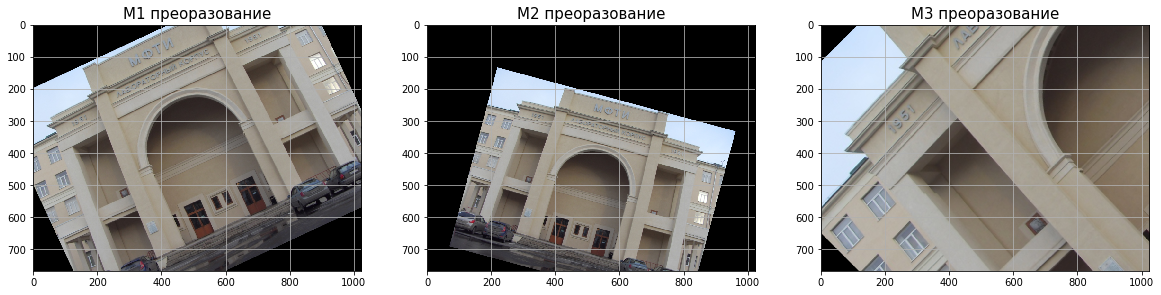

In [22]:
print('Раземер исходного изображения:', img.shape)
rows, cols, _ = img.shape

M1 = cv2.getRotationMatrix2D((cols/2, rows/2), 25, scale=1.0)
M2 = cv2.getRotationMatrix2D((300, 700), -15, scale=0.75)
M3 = cv2.getRotationMatrix2D((300, 100), 45, scale=2.0)

## визуализация
fig, m_axs = plt.subplots(1, 3, figsize=(20,8))
ax1, ax2, ax3 = m_axs

dst1 = cv2.warpAffine(img.copy(), M1, (cols, rows))
ax1.imshow(dst1)
ax1.grid()
ax1.set_title('M1 преоразование', fontsize=15)
dst2 = cv2.warpAffine(img.copy(), M2, (cols, rows))
ax2.imshow(dst2)
ax2.grid()
ax2.set_title('M2 преоразование', fontsize=15)
dst3 = cv2.warpAffine(img.copy(), M3, (cols, rows))
ax3.imshow(dst3)
ax3.grid()
ax3.set_title('M3 преоразование', fontsize=15);

а как сделать нормальный поворт без обрезаний краев? Напишите функцию 


### Трансформация точек

При аффинном преобразовании все параллельные линии в исходном изображении все еще будут параллельны в выходном изображении. Чтобы найти матрицу преобразования, нам нужны три точки из входного изображения и их соответствующие местоположения в выходном изображении. Затем __cv2.getAffineTransform()__ создаст матрицу 2x3, которая должна быть передана в __cv2.warpAffine()__.

Раземер исходного изображения: (768, 1024, 3)


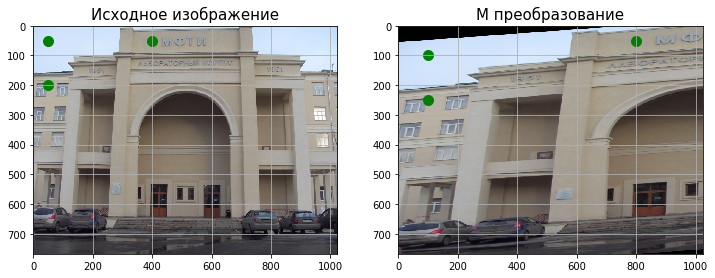

In [23]:
print('Раземер исходного изображения:', img.shape)
rows, cols, _ = img.shape

pts1 = np.float32([[50,50], [400,50], [50,200]])
pts2 = np.float32([[100,100], [800,50], [100,250]]) 

M = cv2.getAffineTransform(pts1, pts2) 
dst = cv2.warpAffine(img.copy(), M, (cols,rows))

fig, m_axs = plt.subplots(1, 2, figsize=(12,8))
ax1, ax2 = m_axs

ax1.set_title('Исходное изображение', fontsize=15)
ax1.imshow(img)
ax1.grid()
ax1.scatter([50, 400, 50], [50, 50, 200], color='g', s=100)
ax2.set_title('M преобразование', fontsize=15)
ax2.imshow(dst)
ax2.grid()
ax2.scatter([100, 800, 100], [100, 50, 250], color='g', s=100);

### Перспектива

Для преобразования перспективы вам понадобится матрица преобразования 3х3. Прямые линии останутся прямыми даже после трансформации. Чтобы найти эту матрицу преобразования, вам нужно 4 точки на входном изображении и соответствующие точки на выходном изображении. Среди этих 4 точек 3 из них не должны быть коллинеарными. Тогда матрица преобразования может быть найдена функцией __cv2.getPerspectiveTransform()__. Затем примените __cv2.warpPerspective()__ с этой матрицей преобразования 3x3.

Раземер исходного изображения: (768, 1024, 3)


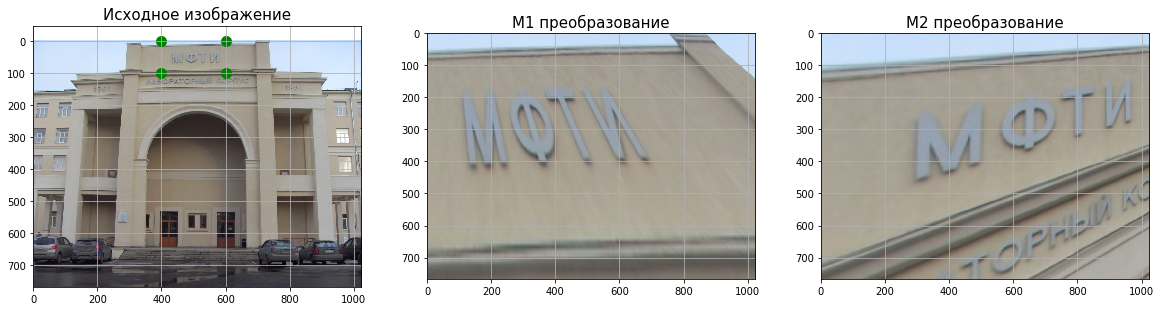

In [24]:
print('Раземер исходного изображения:', img.shape)
rows, cols, _ = img.shape

pts1 = np.float32([[400,0],[600,0],[400,100], [600, 100]])
pts2 = np.float32([[0,0],[cols/2,0],[0,rows], [cols,rows]]) 
pts3 = np.float32([[0,0],[cols,0],[0,rows], [cols,rows/2]]) 


M1 = cv2.getPerspectiveTransform(pts1,pts2) 
M2 = cv2.getPerspectiveTransform(pts1,pts3) 


fig, m_axs = plt.subplots(1, 3, figsize=(20,8))
ax1, ax2, ax3 = m_axs

ax1.set_title('Исходное изображение', fontsize=15)
ax1.imshow(img)
ax1.grid()
ax1.scatter([400, 600, 400, 600], [0, 0, 100, 100], color='g', s=100)

ax2.set_title('M1 преобразование', fontsize=15)
dst2 = cv2.warpPerspective(img.copy(), M1, (cols, rows))
ax2.imshow(dst2)
ax2.grid()

ax3.set_title('M2 преобразование', fontsize=15)
dst3 = cv2.warpPerspective(img.copy(), M2, (cols, rows))
ax3.imshow(dst3)
ax3.grid();

## ROI

Удобная GUI для выделения области на картинке.

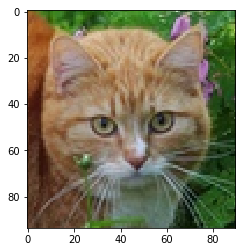

In [25]:
img  = cv2.imread('img/cat.jpg')

roi = cv2.selectROI(img)
imCrop = img[int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])]
 
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(imCrop.copy(), cv2.COLOR_RGB2BGR));

## Работа с входными данными

In [26]:
## как подгружать вебку или видео
import time

## путь к видеофайлу
VIDEO_PATH = None

## если пути нет, то загрузим видеокамеру
if VIDEO_PATH != None:
    vs = cv2.VideoCapture(VIDEO_PATH)
else:
    vs = cv2.VideoCapture(0)
    
## для FPS
start_time = time.time()
num_frames = 0
while True:
    ## каждую итерацию считываем картинку и обрабатываем
    ret, frame = vs.read()
    num_frames += 1
    
    ## изменение размеров картинки
    frame = cv2.resize(frame, (700, 530), interpolation=cv2.INTER_CUBIC)
    
    '''
    Какие-то операции с картинкой
    '''
    
    ## возвращаем измененный frame в видеопоток
    cv2.imshow('Video', frame)
    
    ## ключ для выхода из цикла, если нажать 'q'
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        break
        
seconds = time.time() - start_time
fps = num_frames / seconds
print("[INFO] elapsed time: {:.2f}".format(seconds))
print("[INFO] approx. FPS: {:.2f}".format(fps))
        
## не забываем очистить GUI процесс
cv2.destroyAllWindows()
vs.release()

[INFO] elapsed time: 11.47
[INFO] approx. FPS: 7.15
